In [3]:
!pip install contextily
import matplotlib.pyplot as plt
import numpy as np
import pandas
import datetime
import matplotlib.markers as marker
import matplotlib.image as mpimg
import geopandas as gp
import contextily as cont
from shapely.geometry import Polygon as poly

  Using cached contextily-1.6.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl.metadata (4.8 kB)
  Using cached rasterio-1.4.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.1 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached contextily-1.6.2-py3-none-any.whl (17 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
Using cached rasterio-1.4.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (22.2 MB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Using cached c

In [12]:
def AreaScatterMaps(FilePath,Type,Name=0):
    filedata = pandas.read_csv(FilePath)
    Time = filedata["Time"]
    Lat = filedata["Latitude"]
    Lon = filedata["Longitude"]
    Count = filedata["counts"]
    if "Temperature" in filedata:
        Temp = filedata["Temperature"]
    if "Humidity" in filedata:
        Humidity = filedata["Humidity"]
    if "Pressure" in filedata:
        Pressure = filedata["Pressure"]
    
    Lat = round(Lat,5)
    Lon = round(Lon,5)
    Count = round(Count,0)
    Temp = round(Temp,0)
    Humidity = round(Humidity,0)
    Pressure = round(Pressure,0)
    
    ### Color Sets
    count_colors = []
    for i in range(len(Count)):
        if Count[i]<=30:
            count_colors.append("green")
        elif Count[i]<=40:
            count_colors.append("yellow")
        elif Count[i]<=50:
            count_colors.append("orange")
        elif Count[i]<=100:
            count_colors.append("purple")
        else:
            count_colors.append("black") # or indigo
    
    temp_colors = []
    for i in range(len(Temp)):
        if Temp[i]<=16:
            temp_colors.append("blue")
        elif Temp[i]<=20:
            temp_colors.append("skyblue")
        elif Temp[i]<=24:
            temp_colors.append("yellow")
        else:
            temp_colors.append("orange")
            
    humidity_colors = []
    for i in range(len(Humidity)):
        if Humidity[i]<=47:
            humidity_colors.append("gold")
        elif Humidity[i]<=50:
            humidity_colors.append("skyblue")
        else:
            humidity_colors.append("darkblue")

    ### Plots Set
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    # Map Generator
    Add1 = (max(Lon) - min(Lon))/4
    Add2 = (max(Lat) - min(Lat))/4
    Borders = [(min(Lon)-Add1,max(Lat)+Add2), 
               (min(Lon)-Add1,min(Lat)-Add2),
               (max(Lon)+Add1,min(Lat)-Add2),
               (max(Lon)+Add1,max(Lat)+Add2)]
    Borders = poly(Borders)
    ###

    if Type == "C":
        Map = gp.GeoDataFrame([1], geometry=[Borders], crs="EPSG:4326")
        minx, miny, maxx, maxy = (Map.total_bounds)
        Map.plot(ax=ax, facecolor='none',linewidth=0)
        cont.add_basemap(ax, crs=Map.crs.to_string(), source=cont.providers.OpenStreetMap.Mapnik) # CartoDB.Voyager # 
        ax.scatter(Lon,Lat,color=count_colors,marker="o",alpha=0.3,s=1000)
    elif Type == "H":
        Map = gp.GeoDataFrame([1], geometry=[Borders], crs="EPSG:4326")
        minx, miny, maxx, maxy = (Map.total_bounds)
        Map.plot(ax=ax, facecolor='none',linewidth=0)
        cont.add_basemap(ax, crs=Map.crs.to_string(), source=cont.providers.OpenStreetMap.Mapnik) # CartoDB.Voyager # 
        ax.scatter(Lon,Lat,color=humidity_colors,marker="o",alpha=0.3,s=1000)
    elif Type == "T":
        Map = gp.GeoDataFrame([1], geometry=[Borders], crs="EPSG:4326")
        minx, miny, maxx, maxy = (Map.total_bounds)
        Map.plot(ax=ax, facecolor='none',linewidth=0)
        cont.add_basemap(ax, crs=Map.crs.to_string(), source=cont.providers.OpenStreetMap.Mapnik) # CartoDB.Voyager # 
        ax.scatter(Lon,Lat,color=temp_colors,marker="o",alpha=0.3,s=1000)

    if Name != 0:
         plt.savefig(Name,dpi=300)

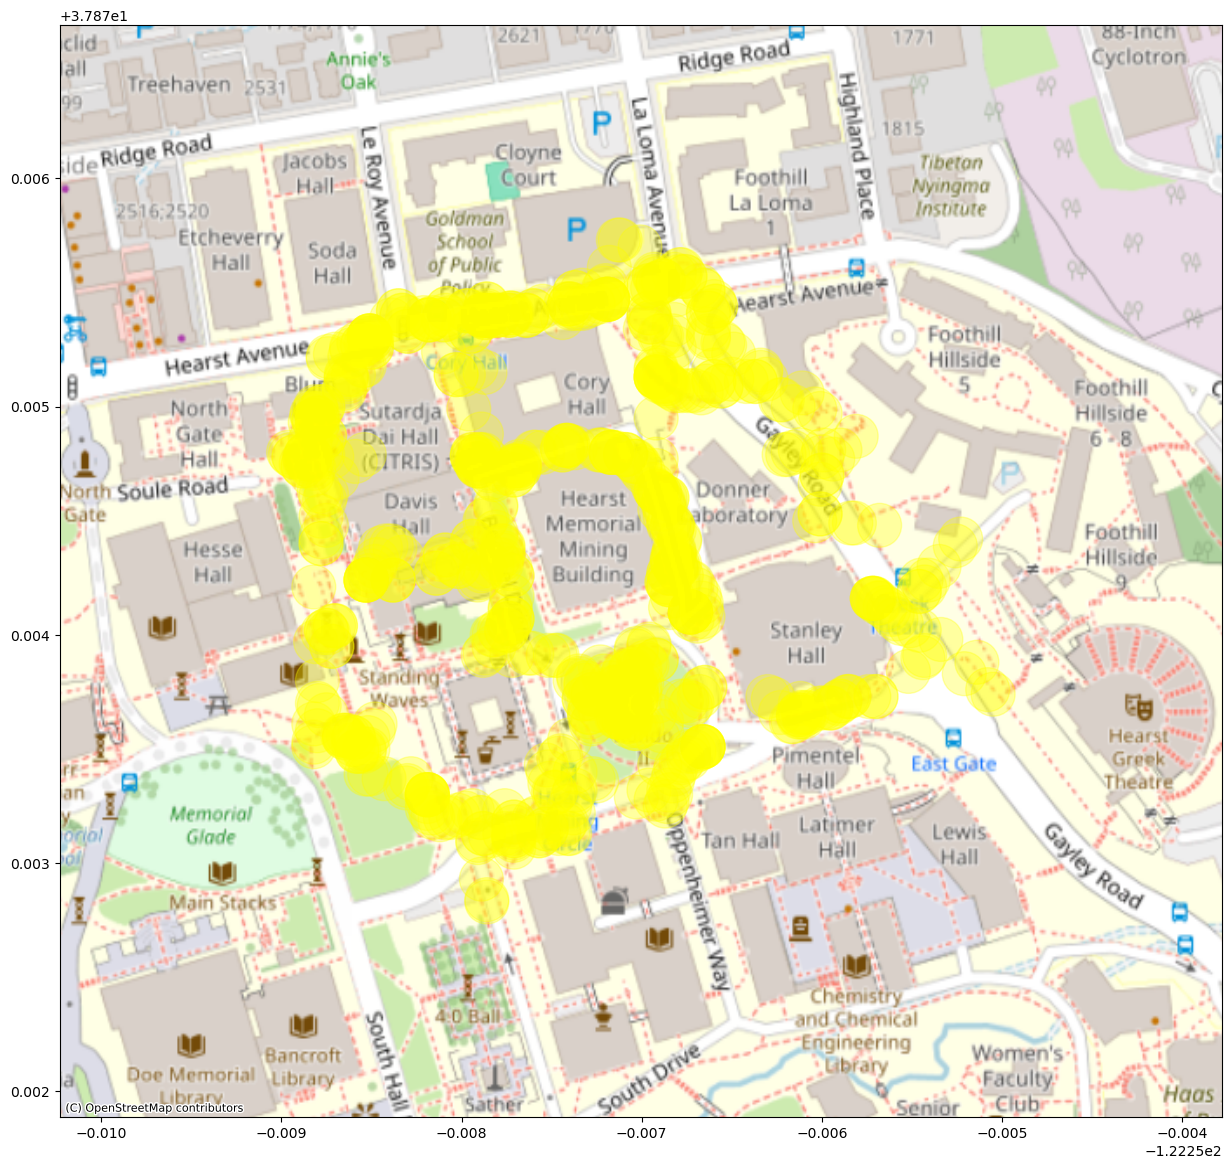

In [13]:
AreaScatterMaps("thursday.csv","C")